In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

# 1. 기존의 프로그램 방식

- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균) 
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-maermse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62

![image.png](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)

- 경사하강법 설명
https://www.mql5.com/ko/articles/11200

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 섭씨온도(input_data)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c * 1.8 + 32

In [4]:
input_c = int(input('섭씨온도는 ? '))
print('화씨 온도는', celsisu_to_faherenheit(input_c))

섭씨온도는 ? 0
화씨 온도는 32.0


# 2. 머신러닝 프로그램 방식
 - 1. 데이터 확보 및 생성 (inputdata, outputdata)
 - 2. 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류, ...)
 - 3. 모델 구성
 - 4. 모델 학습 과정 설정 (손실함수, 옵티마이저, 평가지표)
 - 5. 모델 학습시키기
 - 6. 모델 평가(시험데이터셋)
 - 7. 모델 사용(모델 저장 후, 저장된 모델을 이용하여 입력값이 주어지면 예측값 받기)

## 2.1 노이즈가 없는 데이터로 실습

In [5]:
# 1. 데이터 생성
data_c = np.arange(100)
data_c  # 독립변수(input_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_f = celsisu_to_faherenheit(data_c)
data_f  # 종속변수(타겟변수, output_data)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해서 스케일을 맞춤(전체의 편차를 비슷하게)
scaled_data_c = data_c / 100
scaled_data_f = data_f / 100

In [8]:
# GPU 사용 여부 확인
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [14]:
# 3. 모델 구성
# pip install tensorflow==2.10
from tensorflow.keras.models import Sequential    # 모델 객체 생성을 위함
from tensorflow.keras.layers import Dense, Input  # 입력값과 출력값으로 layer 층 지정

model = Sequential()  # 모델 객체 생성
# model.add(Input(shape = 1))
model.add(Dense(units = 1,           # 종속(타겟, 출력)변수의 갯수
                input_shape = (1, )  # 독립(입력)변수의 shape
                ))  # 모델에 layer를 추가

In [15]:
# 4. 모델 학습과정 설정(손실함수, 옵티마이저, 평가지표)
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# 학습하기 전 예측
model.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 45ms/step


array([[ 0.        ],
       [-0.01616506]], dtype=float32)

In [17]:
model.save('model/before_learning.h5')

In [18]:
# 5. 학습시키기
hist = model.fit(scaled_data_c,  # 독립변수(훈련데이터)
                 scaled_data_f,  # 종속변수(훈련데이터)
                 epochs=1000,    # 학습 횟수
                 verbose=2,      # 학습 시 출력 여부(학습결과)
                )

Epoch 1/1000
4/4 - 1s - loss: 4.9983 - mae: 2.0067 - 564ms/epoch - 141ms/step
Epoch 2/1000
4/4 - 0s - loss: 4.9490 - mae: 1.9955 - 11ms/epoch - 3ms/step
Epoch 3/1000
4/4 - 0s - loss: 4.9168 - mae: 1.9880 - 7ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 4.8854 - mae: 1.9809 - 2ms/epoch - 389us/step
Epoch 5/1000
4/4 - 0s - loss: 4.8555 - mae: 1.9740 - 14ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 4.8270 - mae: 1.9675 - 0s/epoch - 0s/step
Epoch 7/1000
4/4 - 0s - loss: 4.7995 - mae: 1.9610 - 6ms/epoch - 1ms/step
Epoch 8/1000
4/4 - 0s - loss: 4.7723 - mae: 1.9547 - 10ms/epoch - 3ms/step
Epoch 9/1000
4/4 - 0s - loss: 4.7492 - mae: 1.9493 - 5ms/epoch - 1ms/step
Epoch 10/1000
4/4 - 0s - loss: 4.7229 - mae: 1.9431 - 10ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 4.6966 - mae: 1.9370 - 4ms/epoch - 964us/step
Epoch 12/1000
4/4 - 0s - loss: 4.6724 - mae: 1.9312 - 12ms/epoch - 3ms/step
Epoch 13/1000
4/4 - 0s - loss: 4.6497 - mae: 1.9258 - 3ms/epoch - 843us/step
Epoch 14/1000
4/4 - 0

Epoch 110/1000
4/4 - 0s - loss: 2.5926 - mae: 1.3660 - 15ms/epoch - 4ms/step
Epoch 111/1000
4/4 - 0s - loss: 2.5731 - mae: 1.3600 - 0s/epoch - 0s/step
Epoch 112/1000
4/4 - 0s - loss: 2.5565 - mae: 1.3549 - 16ms/epoch - 4ms/step
Epoch 113/1000
4/4 - 0s - loss: 2.5381 - mae: 1.3492 - 0s/epoch - 0s/step
Epoch 114/1000
4/4 - 0s - loss: 2.5195 - mae: 1.3434 - 17ms/epoch - 4ms/step
Epoch 115/1000
4/4 - 0s - loss: 2.5011 - mae: 1.3377 - 0s/epoch - 0s/step
Epoch 116/1000
4/4 - 0s - loss: 2.4847 - mae: 1.3325 - 17ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 2.4690 - mae: 1.3278 - 0s/epoch - 0s/step
Epoch 118/1000
4/4 - 0s - loss: 2.4498 - mae: 1.3216 - 17ms/epoch - 4ms/step
Epoch 119/1000
4/4 - 0s - loss: 2.4335 - mae: 1.3165 - 0s/epoch - 0s/step
Epoch 120/1000
4/4 - 0s - loss: 2.4179 - mae: 1.3117 - 17ms/epoch - 4ms/step
Epoch 121/1000
4/4 - 0s - loss: 2.4019 - mae: 1.3066 - 0s/epoch - 0s/step
Epoch 122/1000
4/4 - 0s - loss: 2.3843 - mae: 1.3011 - 17ms/epoch - 4ms/step
Epoch 123/1000
4/

Epoch 219/1000
4/4 - 0s - loss: 1.0839 - mae: 0.8501 - 17ms/epoch - 4ms/step
Epoch 220/1000
4/4 - 0s - loss: 1.0742 - mae: 0.8462 - 0s/epoch - 0s/step
Epoch 221/1000
4/4 - 0s - loss: 1.0651 - mae: 0.8427 - 17ms/epoch - 4ms/step
Epoch 222/1000
4/4 - 0s - loss: 1.0562 - mae: 0.8392 - 0s/epoch - 0s/step
Epoch 223/1000
4/4 - 0s - loss: 1.0481 - mae: 0.8360 - 17ms/epoch - 4ms/step
Epoch 224/1000
4/4 - 0s - loss: 1.0395 - mae: 0.8328 - 0s/epoch - 0s/step
Epoch 225/1000
4/4 - 0s - loss: 1.0292 - mae: 0.8285 - 17ms/epoch - 4ms/step
Epoch 226/1000
4/4 - 0s - loss: 1.0193 - mae: 0.8247 - 0s/epoch - 0s/step
Epoch 227/1000
4/4 - 0s - loss: 1.0093 - mae: 0.8206 - 16ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.9993 - mae: 0.8167 - 0s/epoch - 0s/step
Epoch 229/1000
4/4 - 0s - loss: 0.9889 - mae: 0.8125 - 17ms/epoch - 4ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.9800 - mae: 0.8089 - 0s/epoch - 0s/step
Epoch 231/1000
4/4 - 0s - loss: 0.9728 - mae: 0.8060 - 17ms/epoch - 4ms/step
Epoch 232/1000
4/

Epoch 329/1000
4/4 - 0s - loss: 0.4096 - mae: 0.5494 - 0s/epoch - 0s/step
Epoch 330/1000
4/4 - 0s - loss: 0.4082 - mae: 0.5486 - 0s/epoch - 0s/step
Epoch 331/1000
4/4 - 0s - loss: 0.4055 - mae: 0.5470 - 0s/epoch - 0s/step
Epoch 332/1000
4/4 - 0s - loss: 0.4030 - mae: 0.5456 - 0s/epoch - 0s/step
Epoch 333/1000
4/4 - 0s - loss: 0.4008 - mae: 0.5442 - 0s/epoch - 0s/step
Epoch 334/1000
4/4 - 0s - loss: 0.3991 - mae: 0.5433 - 0s/epoch - 0s/step
Epoch 335/1000
4/4 - 0s - loss: 0.3972 - mae: 0.5423 - 17ms/epoch - 4ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.3946 - mae: 0.5407 - 0s/epoch - 0s/step
Epoch 337/1000
4/4 - 0s - loss: 0.3929 - mae: 0.5395 - 16ms/epoch - 4ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.3906 - mae: 0.5381 - 0s/epoch - 0s/step
Epoch 339/1000
4/4 - 0s - loss: 0.3884 - mae: 0.5367 - 17ms/epoch - 4ms/step
Epoch 340/1000
4/4 - 0s - loss: 0.3854 - mae: 0.5350 - 0s/epoch - 0s/step
Epoch 341/1000
4/4 - 0s - loss: 0.3835 - mae: 0.5338 - 17ms/epoch - 4ms/step
Epoch 342/1000
4/4 - 0s - 

Epoch 438/1000
4/4 - 0s - loss: 0.2676 - mae: 0.4475 - 5ms/epoch - 1ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.2668 - mae: 0.4468 - 17ms/epoch - 4ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.2658 - mae: 0.4459 - 13ms/epoch - 3ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.2646 - mae: 0.4449 - 2ms/epoch - 434us/step
Epoch 442/1000
4/4 - 0s - loss: 0.2636 - mae: 0.4441 - 14ms/epoch - 3ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.2627 - mae: 0.4432 - 0s/epoch - 0s/step
Epoch 444/1000
4/4 - 0s - loss: 0.2618 - mae: 0.4424 - 14ms/epoch - 4ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.2610 - mae: 0.4417 - 2ms/epoch - 381us/step
Epoch 446/1000
4/4 - 0s - loss: 0.2599 - mae: 0.4408 - 13ms/epoch - 3ms/step
Epoch 447/1000
4/4 - 0s - loss: 0.2590 - mae: 0.4400 - 410us/epoch - 102us/step
Epoch 448/1000
4/4 - 0s - loss: 0.2580 - mae: 0.4392 - 14ms/epoch - 4ms/step
Epoch 449/1000
4/4 - 0s - loss: 0.2571 - mae: 0.4385 - 0s/epoch - 0s/step
Epoch 450/1000
4/4 - 0s - loss: 0.2562 - mae: 0.4376 - 14ms/epoch - 4ms/step
E

Epoch 547/1000
4/4 - 0s - loss: 0.1707 - mae: 0.3569 - 17ms/epoch - 4ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.1699 - mae: 0.3562 - 17ms/epoch - 4ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.1690 - mae: 0.3553 - 0s/epoch - 0s/step
Epoch 550/1000
4/4 - 0s - loss: 0.1683 - mae: 0.3544 - 0s/epoch - 0s/step
Epoch 551/1000
4/4 - 0s - loss: 0.1673 - mae: 0.3534 - 0s/epoch - 0s/step
Epoch 552/1000
4/4 - 0s - loss: 0.1664 - mae: 0.3524 - 0s/epoch - 0s/step
Epoch 553/1000
4/4 - 0s - loss: 0.1656 - mae: 0.3515 - 16ms/epoch - 4ms/step
Epoch 554/1000
4/4 - 0s - loss: 0.1648 - mae: 0.3506 - 0s/epoch - 0s/step
Epoch 555/1000
4/4 - 0s - loss: 0.1639 - mae: 0.3497 - 16ms/epoch - 4ms/step
Epoch 556/1000
4/4 - 0s - loss: 0.1631 - mae: 0.3488 - 0s/epoch - 0s/step
Epoch 557/1000
4/4 - 0s - loss: 0.1623 - mae: 0.3480 - 0s/epoch - 0s/step
Epoch 558/1000
4/4 - 0s - loss: 0.1613 - mae: 0.3470 - 0s/epoch - 0s/step
Epoch 559/1000
4/4 - 0s - loss: 0.1604 - mae: 0.3460 - 0s/epoch - 0s/step
Epoch 560/1000
4/4 - 0s - 

4/4 - 0s - loss: 0.0945 - mae: 0.2655 - 0s/epoch - 0s/step
Epoch 658/1000
4/4 - 0s - loss: 0.0939 - mae: 0.2646 - 2ms/epoch - 382us/step
Epoch 659/1000
4/4 - 0s - loss: 0.0932 - mae: 0.2637 - 0s/epoch - 0s/step
Epoch 660/1000
4/4 - 0s - loss: 0.0926 - mae: 0.2628 - 17ms/epoch - 4ms/step
Epoch 661/1000
4/4 - 0s - loss: 0.0920 - mae: 0.2620 - 0s/epoch - 0s/step
Epoch 662/1000
4/4 - 0s - loss: 0.0914 - mae: 0.2611 - 17ms/epoch - 4ms/step
Epoch 663/1000
4/4 - 0s - loss: 0.0908 - mae: 0.2603 - 0s/epoch - 0s/step
Epoch 664/1000
4/4 - 0s - loss: 0.0903 - mae: 0.2595 - 17ms/epoch - 4ms/step
Epoch 665/1000
4/4 - 0s - loss: 0.0896 - mae: 0.2587 - 0s/epoch - 0s/step
Epoch 666/1000
4/4 - 0s - loss: 0.0890 - mae: 0.2577 - 16ms/epoch - 4ms/step
Epoch 667/1000
4/4 - 0s - loss: 0.0884 - mae: 0.2568 - 0s/epoch - 0s/step
Epoch 668/1000
4/4 - 0s - loss: 0.0879 - mae: 0.2560 - 0s/epoch - 0s/step
Epoch 669/1000
4/4 - 0s - loss: 0.0874 - mae: 0.2552 - 0s/epoch - 0s/step
Epoch 670/1000
4/4 - 0s - loss: 0.086

Epoch 767/1000
4/4 - 0s - loss: 0.0408 - mae: 0.1743 - 0s/epoch - 0s/step
Epoch 768/1000
4/4 - 0s - loss: 0.0404 - mae: 0.1735 - 0s/epoch - 0s/step
Epoch 769/1000
4/4 - 0s - loss: 0.0401 - mae: 0.1727 - 0s/epoch - 0s/step
Epoch 770/1000
4/4 - 0s - loss: 0.0396 - mae: 0.1717 - 0s/epoch - 0s/step
Epoch 771/1000
4/4 - 0s - loss: 0.0392 - mae: 0.1709 - 0s/epoch - 0s/step
Epoch 772/1000
4/4 - 0s - loss: 0.0389 - mae: 0.1702 - 0s/epoch - 0s/step
Epoch 773/1000
4/4 - 0s - loss: 0.0385 - mae: 0.1693 - 0s/epoch - 0s/step
Epoch 774/1000
4/4 - 0s - loss: 0.0381 - mae: 0.1686 - 0s/epoch - 0s/step
Epoch 775/1000
4/4 - 0s - loss: 0.0377 - mae: 0.1677 - 0s/epoch - 0s/step
Epoch 776/1000
4/4 - 0s - loss: 0.0373 - mae: 0.1668 - 0s/epoch - 0s/step
Epoch 777/1000
4/4 - 0s - loss: 0.0369 - mae: 0.1659 - 0s/epoch - 0s/step
Epoch 778/1000
4/4 - 0s - loss: 0.0366 - mae: 0.1651 - 0s/epoch - 0s/step
Epoch 779/1000
4/4 - 0s - loss: 0.0363 - mae: 0.1643 - 0s/epoch - 0s/step
Epoch 780/1000
4/4 - 0s - loss: 0.0359

Epoch 876/1000
4/4 - 0s - loss: 0.0090 - mae: 0.0820 - 0s/epoch - 0s/step
Epoch 877/1000
4/4 - 0s - loss: 0.0089 - mae: 0.0812 - 5ms/epoch - 1ms/step
Epoch 878/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0807 - 0s/epoch - 0s/step
Epoch 879/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0799 - 5ms/epoch - 1ms/step
Epoch 880/1000
4/4 - 0s - loss: 0.0084 - mae: 0.0791 - 0s/epoch - 0s/step
Epoch 881/1000
4/4 - 0s - loss: 0.0082 - mae: 0.0783 - 5ms/epoch - 1ms/step
Epoch 882/1000
4/4 - 0s - loss: 0.0080 - mae: 0.0774 - 0s/epoch - 0s/step
Epoch 883/1000
4/4 - 0s - loss: 0.0079 - mae: 0.0766 - 5ms/epoch - 1ms/step
Epoch 884/1000
4/4 - 0s - loss: 0.0077 - mae: 0.0758 - 16ms/epoch - 4ms/step
Epoch 885/1000
4/4 - 0s - loss: 0.0075 - mae: 0.0750 - 12ms/epoch - 3ms/step
Epoch 886/1000
4/4 - 0s - loss: 0.0074 - mae: 0.0740 - 2ms/epoch - 584us/step
Epoch 887/1000
4/4 - 0s - loss: 0.0072 - mae: 0.0731 - 12ms/epoch - 3ms/step
Epoch 888/1000
4/4 - 0s - loss: 0.0070 - mae: 0.0723 - 2ms/epoch - 575us/step
Epoch 889/100

Epoch 983/1000
4/4 - 0s - loss: 1.6995e-06 - mae: 0.0011 - 5ms/epoch - 1ms/step
Epoch 984/1000
4/4 - 0s - loss: 8.7784e-07 - mae: 7.9887e-04 - 0s/epoch - 0s/step
Epoch 985/1000
4/4 - 0s - loss: 5.9595e-07 - mae: 6.4426e-04 - 5ms/epoch - 1ms/step
Epoch 986/1000
4/4 - 0s - loss: 2.0434e-07 - mae: 3.4863e-04 - 0s/epoch - 0s/step
Epoch 987/1000
4/4 - 0s - loss: 6.6148e-08 - mae: 2.1660e-04 - 6ms/epoch - 1ms/step
Epoch 988/1000
4/4 - 0s - loss: 1.0267e-06 - mae: 9.4780e-04 - 0s/epoch - 0s/step
Epoch 989/1000
4/4 - 0s - loss: 5.7290e-07 - mae: 7.4226e-04 - 6ms/epoch - 2ms/step
Epoch 990/1000
4/4 - 0s - loss: 1.2560e-07 - mae: 3.4495e-04 - 0s/epoch - 0s/step
Epoch 991/1000
4/4 - 0s - loss: 3.3218e-07 - mae: 5.2375e-04 - 6ms/epoch - 2ms/step
Epoch 992/1000
4/4 - 0s - loss: 1.5395e-06 - mae: 0.0012 - 9ms/epoch - 2ms/step
Epoch 993/1000
4/4 - 0s - loss: 3.8245e-07 - mae: 5.9755e-04 - 5ms/epoch - 1ms/step
Epoch 994/1000
4/4 - 0s - loss: 1.6403e-07 - mae: 3.9380e-04 - 0s/epoch - 0s/step
Epoch 995/

In [21]:
# 6. 모델 평가(시험 데이터 셋으로 모델 평가), 그래프 그리기
hist.history.keys()  # 딕셔너리

dict_keys(['loss', 'mae'])

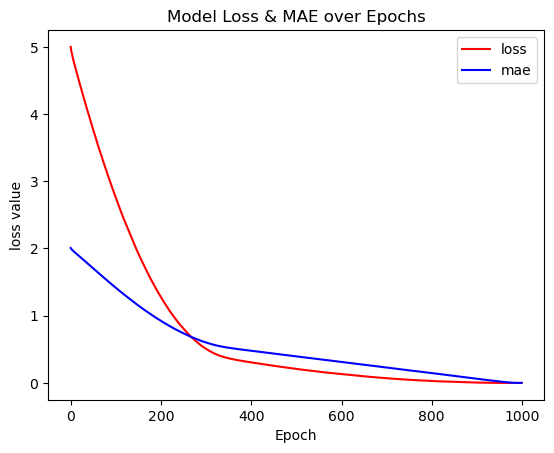

In [28]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss value')  # (predict값-target값)
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [29]:
# 7. 모델 사용하기
model.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 24ms/step


array([[0.3196846],
       [0.3376773]], dtype=float32)

In [30]:
model.save('model/after_learning.h5')

In [36]:
# 실제값 : scaled_data_f
# 예측값 : y_hat
y_hat = model.predict([scaled_data_c])
for y, h in zip(scaled_data_f, y_hat):
    print('실제값 : {}, 예측값 : {}'.format(round(y*100, 1), round(h[0]*100, 1)))

4/4 [==============================] - 0s 2ms/step
실제값 : 32.0, 예측값 : 32.0
실제값 : 33.8, 예측값 : 33.8
실제값 : 35.6, 예측값 : 35.6
실제값 : 37.4, 예측값 : 37.4
실제값 : 39.2, 예측값 : 39.2
실제값 : 41.0, 예측값 : 41.0
실제값 : 42.8, 예측값 : 42.8
실제값 : 44.6, 예측값 : 44.6
실제값 : 46.4, 예측값 : 46.4
실제값 : 48.2, 예측값 : 48.2
실제값 : 50.0, 예측값 : 50.0
실제값 : 51.8, 예측값 : 51.8
실제값 : 53.6, 예측값 : 53.6
실제값 : 55.4, 예측값 : 55.4
실제값 : 57.2, 예측값 : 57.2
실제값 : 59.0, 예측값 : 59.0
실제값 : 60.8, 예측값 : 60.8
실제값 : 62.6, 예측값 : 62.6
실제값 : 64.4, 예측값 : 64.4
실제값 : 66.2, 예측값 : 66.2
실제값 : 68.0, 예측값 : 68.0
실제값 : 69.8, 예측값 : 69.8
실제값 : 71.6, 예측값 : 71.6
실제값 : 73.4, 예측값 : 73.4
실제값 : 75.2, 예측값 : 75.2
실제값 : 77.0, 예측값 : 77.0
실제값 : 78.8, 예측값 : 78.7
실제값 : 80.6, 예측값 : 80.5
실제값 : 82.4, 예측값 : 82.3
실제값 : 84.2, 예측값 : 84.1
실제값 : 86.0, 예측값 : 85.9
실제값 : 87.8, 예측값 : 87.7
실제값 : 89.6, 예측값 : 89.5
실제값 : 91.4, 예측값 : 91.3
실제값 : 93.2, 예측값 : 93.1
실제값 : 95.0, 예측값 : 94.9
실제값 : 96.8, 예측값 : 96.7
실제값 : 98.6, 예측값 : 98.5
실제값 : 100.4, 예측값 : 100.3
실제값 : 102.2, 예측값 : 102.1
실제값 : 104.0, 예측값 : 103.9


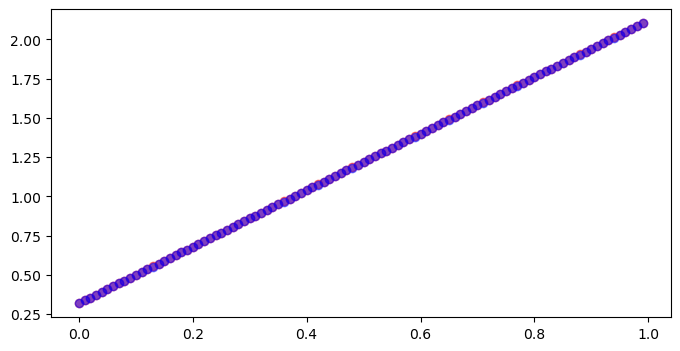

In [39]:
plt.figure(figsize=(8, 4))
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='r', alpha=0.5)
plt.scatter(x=scaled_data_c, y=y_hat, c='b', alpha=0.5)  # 두 개가 겹쳐져서 보라색으로 보임
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [45]:
# 평균이 0이고 표준편차가 0.1인 정규분포를 이루는 데이터 100개
np.random.seed(7)
noise = np.random.normal(loc=0, scale=0.1, size=100)
# print(noise)
# print(scaled_data_f)
scaled_data_f = scaled_data_f + noise

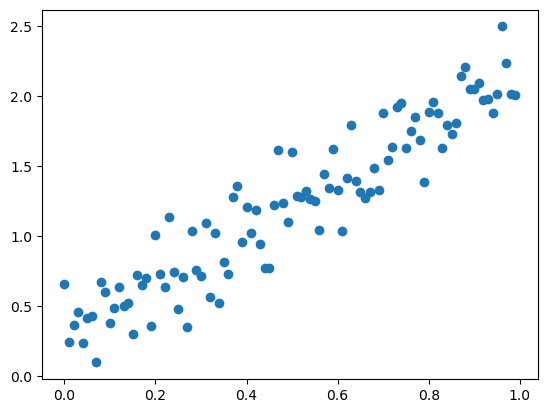

In [46]:
plt.scatter(x=scaled_data_c, y=scaled_data_f)
plt.show()

In [47]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))

# 4. 모델 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
# 5. 학습시키기
hist2 = model2.fit(scaled_data_c, scaled_data_f, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 2.9201 - mae: 1.5322 - 366ms/epoch - 92ms/step
Epoch 2/1000
4/4 - 0s - loss: 2.8818 - mae: 1.5206 - 8ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 2.8556 - mae: 1.5129 - 6ms/epoch - 1ms/step
Epoch 4/1000
4/4 - 0s - loss: 2.8320 - mae: 1.5057 - 3ms/epoch - 757us/step
Epoch 5/1000
4/4 - 0s - loss: 2.8100 - mae: 1.4990 - 0s/epoch - 0s/step
Epoch 6/1000
4/4 - 0s - loss: 2.7903 - mae: 1.4929 - 17ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 2.7711 - mae: 1.4871 - 0s/epoch - 0s/step
Epoch 8/1000
4/4 - 0s - loss: 2.7501 - mae: 1.4805 - 0s/epoch - 0s/step
Epoch 9/1000
4/4 - 0s - loss: 2.7304 - mae: 1.4745 - 16ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 2.7097 - mae: 1.4680 - 0s/epoch - 0s/step
Epoch 11/1000
4/4 - 0s - loss: 2.6934 - mae: 1.4629 - 17ms/epoch - 4ms/step
Epoch 12/1000
4/4 - 0s - loss: 2.6760 - mae: 1.4575 - 0s/epoch - 0s/step
Epoch 13/1000
4/4 - 0s - loss: 2.6563 - mae: 1.4514 - 17ms/epoch - 4ms/step
Epoch 14/1000
4/4 - 0s - loss: 2.63

Epoch 111/1000
4/4 - 0s - loss: 1.1843 - mae: 0.9027 - 0s/epoch - 0s/step
Epoch 112/1000
4/4 - 0s - loss: 1.1750 - mae: 0.8985 - 17ms/epoch - 4ms/step
Epoch 113/1000
4/4 - 0s - loss: 1.1635 - mae: 0.8936 - 0s/epoch - 0s/step
Epoch 114/1000
4/4 - 0s - loss: 1.1527 - mae: 0.8891 - 17ms/epoch - 4ms/step
Epoch 115/1000
4/4 - 0s - loss: 1.1416 - mae: 0.8842 - 0s/epoch - 0s/step
Epoch 116/1000
4/4 - 0s - loss: 1.1296 - mae: 0.8788 - 16ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 1.1187 - mae: 0.8741 - 0s/epoch - 0s/step
Epoch 118/1000
4/4 - 0s - loss: 1.1068 - mae: 0.8688 - 17ms/epoch - 4ms/step
Epoch 119/1000
4/4 - 0s - loss: 1.0951 - mae: 0.8638 - 0s/epoch - 0s/step
Epoch 120/1000
4/4 - 0s - loss: 1.0841 - mae: 0.8590 - 0s/epoch - 0s/step
Epoch 121/1000
4/4 - 0s - loss: 1.0729 - mae: 0.8539 - 0s/epoch - 0s/step
Epoch 122/1000
4/4 - 0s - loss: 1.0631 - mae: 0.8495 - 0s/epoch - 0s/step
Epoch 123/1000
4/4 - 0s - loss: 1.0516 - mae: 0.8444 - 0s/epoch - 0s/step
Epoch 124/1000
4/4 - 0s - 

Epoch 220/1000
4/4 - 0s - loss: 0.3542 - mae: 0.4996 - 0s/epoch - 0s/step
Epoch 221/1000
4/4 - 0s - loss: 0.3502 - mae: 0.4971 - 0s/epoch - 0s/step
Epoch 222/1000
4/4 - 0s - loss: 0.3460 - mae: 0.4944 - 0s/epoch - 0s/step
Epoch 223/1000
4/4 - 0s - loss: 0.3416 - mae: 0.4916 - 0s/epoch - 0s/step
Epoch 224/1000
4/4 - 0s - loss: 0.3375 - mae: 0.4889 - 0s/epoch - 0s/step
Epoch 225/1000
4/4 - 0s - loss: 0.3342 - mae: 0.4867 - 0s/epoch - 0s/step
Epoch 226/1000
4/4 - 0s - loss: 0.3297 - mae: 0.4838 - 0s/epoch - 0s/step
Epoch 227/1000
4/4 - 0s - loss: 0.3259 - mae: 0.4812 - 0s/epoch - 0s/step
Epoch 228/1000
4/4 - 0s - loss: 0.3229 - mae: 0.4792 - 2ms/epoch - 381us/step
Epoch 229/1000
4/4 - 0s - loss: 0.3193 - mae: 0.4769 - 0s/epoch - 0s/step
Epoch 230/1000
4/4 - 0s - loss: 0.3165 - mae: 0.4749 - 17ms/epoch - 4ms/step
Epoch 231/1000
4/4 - 0s - loss: 0.3134 - mae: 0.4728 - 0s/epoch - 0s/step
Epoch 232/1000
4/4 - 0s - loss: 0.3098 - mae: 0.4704 - 17ms/epoch - 4ms/step
Epoch 233/1000
4/4 - 0s - lo

Epoch 330/1000
4/4 - 0s - loss: 0.1848 - mae: 0.3586 - 17ms/epoch - 4ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.1844 - mae: 0.3582 - 0s/epoch - 0s/step
Epoch 332/1000
4/4 - 0s - loss: 0.1836 - mae: 0.3575 - 17ms/epoch - 4ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.1828 - mae: 0.3567 - 0s/epoch - 0s/step
Epoch 334/1000
4/4 - 0s - loss: 0.1822 - mae: 0.3560 - 17ms/epoch - 4ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.1815 - mae: 0.3553 - 0s/epoch - 0s/step
Epoch 336/1000
4/4 - 0s - loss: 0.1808 - mae: 0.3546 - 16ms/epoch - 4ms/step
Epoch 337/1000
4/4 - 0s - loss: 0.1802 - mae: 0.3540 - 0s/epoch - 0s/step
Epoch 338/1000
4/4 - 0s - loss: 0.1795 - mae: 0.3534 - 0s/epoch - 0s/step
Epoch 339/1000
4/4 - 0s - loss: 0.1789 - mae: 0.3528 - 0s/epoch - 0s/step
Epoch 340/1000
4/4 - 0s - loss: 0.1784 - mae: 0.3523 - 0s/epoch - 0s/step
Epoch 341/1000
4/4 - 0s - loss: 0.1779 - mae: 0.3518 - 0s/epoch - 0s/step
Epoch 342/1000
4/4 - 0s - loss: 0.1771 - mae: 0.3509 - 0s/epoch - 0s/step
Epoch 343/1000
4/4 - 0s - 

Epoch 440/1000
4/4 - 0s - loss: 0.1206 - mae: 0.2876 - 0s/epoch - 0s/step
Epoch 441/1000
4/4 - 0s - loss: 0.1200 - mae: 0.2870 - 17ms/epoch - 4ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.1195 - mae: 0.2866 - 0s/epoch - 0s/step
Epoch 443/1000
4/4 - 0s - loss: 0.1190 - mae: 0.2860 - 17ms/epoch - 4ms/step
Epoch 444/1000
4/4 - 0s - loss: 0.1184 - mae: 0.2852 - 0s/epoch - 0s/step
Epoch 445/1000
4/4 - 0s - loss: 0.1179 - mae: 0.2844 - 16ms/epoch - 4ms/step
Epoch 446/1000
4/4 - 0s - loss: 0.1175 - mae: 0.2840 - 0s/epoch - 0s/step
Epoch 447/1000
4/4 - 0s - loss: 0.1170 - mae: 0.2835 - 17ms/epoch - 4ms/step
Epoch 448/1000
4/4 - 0s - loss: 0.1165 - mae: 0.2829 - 0s/epoch - 0s/step
Epoch 449/1000
4/4 - 0s - loss: 0.1160 - mae: 0.2821 - 17ms/epoch - 4ms/step
Epoch 450/1000
4/4 - 0s - loss: 0.1155 - mae: 0.2815 - 0s/epoch - 0s/step
Epoch 451/1000
4/4 - 0s - loss: 0.1151 - mae: 0.2811 - 17ms/epoch - 4ms/step
Epoch 452/1000
4/4 - 0s - loss: 0.1146 - mae: 0.2803 - 0s/epoch - 0s/step
Epoch 453/1000
4/4 -

Epoch 550/1000
4/4 - 0s - loss: 0.0761 - mae: 0.2264 - 0s/epoch - 0s/step
Epoch 551/1000
4/4 - 0s - loss: 0.0758 - mae: 0.2256 - 16ms/epoch - 4ms/step
Epoch 552/1000
4/4 - 0s - loss: 0.0755 - mae: 0.2251 - 0s/epoch - 0s/step
Epoch 553/1000
4/4 - 0s - loss: 0.0752 - mae: 0.2249 - 0s/epoch - 0s/step
Epoch 554/1000
4/4 - 0s - loss: 0.0749 - mae: 0.2240 - 0s/epoch - 0s/step
Epoch 555/1000
4/4 - 0s - loss: 0.0747 - mae: 0.2238 - 0s/epoch - 0s/step
Epoch 556/1000
4/4 - 0s - loss: 0.0744 - mae: 0.2236 - 0s/epoch - 0s/step
Epoch 557/1000
4/4 - 0s - loss: 0.0741 - mae: 0.2230 - 0s/epoch - 0s/step
Epoch 558/1000
4/4 - 0s - loss: 0.0739 - mae: 0.2223 - 0s/epoch - 0s/step
Epoch 559/1000
4/4 - 0s - loss: 0.0737 - mae: 0.2220 - 0s/epoch - 0s/step
Epoch 560/1000
4/4 - 0s - loss: 0.0735 - mae: 0.2216 - 0s/epoch - 0s/step
Epoch 561/1000
4/4 - 0s - loss: 0.0733 - mae: 0.2210 - 0s/epoch - 0s/step
Epoch 562/1000
4/4 - 0s - loss: 0.0730 - mae: 0.2206 - 0s/epoch - 0s/step
Epoch 563/1000
4/4 - 0s - loss: 0.0

Epoch 660/1000
4/4 - 0s - loss: 0.0529 - mae: 0.1832 - 0s/epoch - 0s/step
Epoch 661/1000
4/4 - 0s - loss: 0.0528 - mae: 0.1830 - 0s/epoch - 0s/step
Epoch 662/1000
4/4 - 0s - loss: 0.0526 - mae: 0.1826 - 0s/epoch - 0s/step
Epoch 663/1000
4/4 - 0s - loss: 0.0524 - mae: 0.1823 - 0s/epoch - 0s/step
Epoch 664/1000
4/4 - 0s - loss: 0.0524 - mae: 0.1821 - 0s/epoch - 0s/step
Epoch 665/1000
4/4 - 0s - loss: 0.0523 - mae: 0.1819 - 0s/epoch - 0s/step
Epoch 666/1000
4/4 - 0s - loss: 0.0521 - mae: 0.1815 - 0s/epoch - 0s/step
Epoch 667/1000
4/4 - 0s - loss: 0.0520 - mae: 0.1813 - 0s/epoch - 0s/step
Epoch 668/1000
4/4 - 0s - loss: 0.0519 - mae: 0.1811 - 17ms/epoch - 4ms/step
Epoch 669/1000
4/4 - 0s - loss: 0.0517 - mae: 0.1807 - 0s/epoch - 0s/step
Epoch 670/1000
4/4 - 0s - loss: 0.0516 - mae: 0.1805 - 17ms/epoch - 4ms/step
Epoch 671/1000
4/4 - 0s - loss: 0.0516 - mae: 0.1803 - 0s/epoch - 0s/step
Epoch 672/1000
4/4 - 0s - loss: 0.0514 - mae: 0.1799 - 17ms/epoch - 4ms/step
Epoch 673/1000
4/4 - 0s - los

Epoch 770/1000
4/4 - 0s - loss: 0.0440 - mae: 0.1652 - 0s/epoch - 0s/step
Epoch 771/1000
4/4 - 0s - loss: 0.0440 - mae: 0.1653 - 5ms/epoch - 1ms/step
Epoch 772/1000
4/4 - 0s - loss: 0.0440 - mae: 0.1652 - 0s/epoch - 0s/step
Epoch 773/1000
4/4 - 0s - loss: 0.0439 - mae: 0.1649 - 0s/epoch - 0s/step
Epoch 774/1000
4/4 - 0s - loss: 0.0439 - mae: 0.1650 - 0s/epoch - 0s/step
Epoch 775/1000
4/4 - 0s - loss: 0.0439 - mae: 0.1649 - 0s/epoch - 0s/step
Epoch 776/1000
4/4 - 0s - loss: 0.0438 - mae: 0.1650 - 0s/epoch - 0s/step
Epoch 777/1000
4/4 - 0s - loss: 0.0438 - mae: 0.1649 - 0s/epoch - 0s/step
Epoch 778/1000
4/4 - 0s - loss: 0.0438 - mae: 0.1650 - 0s/epoch - 0s/step
Epoch 779/1000
4/4 - 0s - loss: 0.0437 - mae: 0.1648 - 0s/epoch - 0s/step
Epoch 780/1000
4/4 - 0s - loss: 0.0437 - mae: 0.1647 - 0s/epoch - 0s/step
Epoch 781/1000
4/4 - 0s - loss: 0.0436 - mae: 0.1643 - 0s/epoch - 0s/step
Epoch 782/1000
4/4 - 0s - loss: 0.0436 - mae: 0.1642 - 0s/epoch - 0s/step
Epoch 783/1000
4/4 - 0s - loss: 0.04

Epoch 880/1000
4/4 - 0s - loss: 0.0417 - mae: 0.1600 - 0s/epoch - 0s/step
Epoch 881/1000
4/4 - 0s - loss: 0.0417 - mae: 0.1600 - 0s/epoch - 0s/step
Epoch 882/1000
4/4 - 0s - loss: 0.0417 - mae: 0.1599 - 0s/epoch - 0s/step
Epoch 883/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1599 - 0s/epoch - 0s/step
Epoch 884/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1602 - 0s/epoch - 0s/step
Epoch 885/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1606 - 0s/epoch - 0s/step
Epoch 886/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1602 - 0s/epoch - 0s/step
Epoch 887/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1604 - 0s/epoch - 0s/step
Epoch 888/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1604 - 0s/epoch - 0s/step
Epoch 889/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1600 - 0s/epoch - 0s/step
Epoch 890/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1603 - 2ms/epoch - 421us/step
Epoch 891/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1603 - 0s/epoch - 0s/step
Epoch 892/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1602 - 0s/epoch - 0s/step
Epoch 893/1000
4/4 - 0s - loss: 0.

Epoch 990/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1607 - 17ms/epoch - 4ms/step
Epoch 991/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1606 - 0s/epoch - 0s/step
Epoch 992/1000
4/4 - 0s - loss: 0.0413 - mae: 0.1608 - 17ms/epoch - 4ms/step
Epoch 993/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1610 - 0s/epoch - 0s/step
Epoch 994/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1610 - 17ms/epoch - 4ms/step
Epoch 995/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1608 - 0s/epoch - 0s/step
Epoch 996/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1608 - 16ms/epoch - 4ms/step
Epoch 997/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1610 - 0s/epoch - 0s/step
Epoch 998/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1608 - 16ms/epoch - 4ms/step
Epoch 999/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1605 - 0s/epoch - 0s/step
Epoch 1000/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1605 - 17ms/epoch - 4ms/step


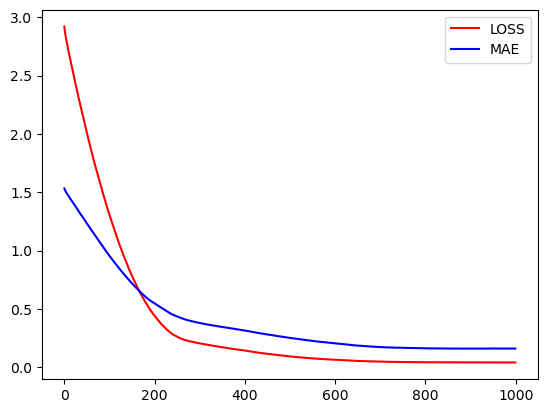

In [50]:
# 6. 평가하기
plt.plot(hist2.history['loss'], 'r', label='LOSS')
plt.plot(hist2.history['mae'], 'b', label='MAE')
plt.legend()
plt.show()

In [51]:
# 7. 예측하기
model2.predict(np.array([[0],
                         [0.01]]))

1/1 [==============================] - 0s 51ms/step


array([[0.30609512],
       [0.32448646]], dtype=float32)

In [52]:
y_hat2 = model2.predict([scaled_data_c])

4/4 [==============================] - 0s 4ms/step


In [53]:
for h, y in zip(y_hat2, scaled_data_f):
    print('예측 : {}, 실제 : {}'.format(h, y))

예측 : [0.30609512], 실제 : 0.6581051407600713
예측 : [0.32448646], 실제 : 0.24481252589183342
예측 : [0.3428778], 실제 : 0.36256403273571697
예측 : [0.36126912], 실제 : 0.4555032565993016
예측 : [0.37966046], 실제 : 0.23421539427485227
예측 : [0.3980518], 실제 : 0.4104131145811896
예측 : [0.41644314], 실제 : 0.42782192282841375
예측 : [0.43483448], 실제 : 0.09505513873091581
예측 : [0.4532258], 실제 : 0.6675316011326986
예측 : [0.47161716], 실제 : 0.6020997031839099
예측 : [0.49000847], 실제 : 0.3749142052066481
예측 : [0.50839984], 실제 : 0.4836903477608558
예측 : [0.52679116], 실제 : 0.6370598748393503
예측 : [0.54518247], 실제 : 0.5017287169616707
예측 : [0.56357384], 실제 : 0.5234501842654908
예측 : [0.58196515], 실제 : 0.29935171750184175
예측 : [0.60035646], 실제 : 0.7189160623783776
예측 : [0.61874783], 실제 : 0.6507761810574076
예측 : [0.6371392], 실제 : 0.6988919847519927
예측 : [0.65553045], 실제 : 0.3566950936260319
예측 : [0.6739218], 실제 : 1.010139938237295
예측 : [0.69231313], 실제 : 0.7288671070912717
예측 : [0.7107045], 실제 : 0.6385720113427225
예측 : [0.7290

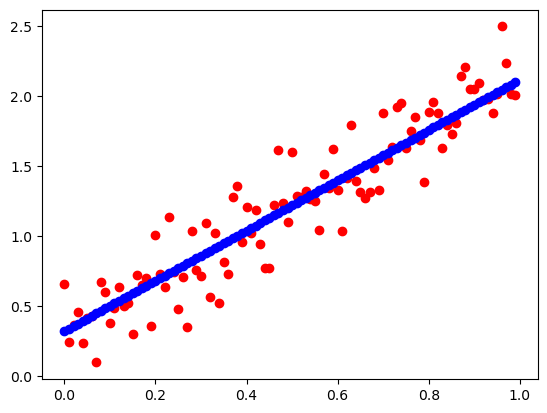

In [56]:
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='r')
plt.scatter(x=scaled_data_c, y=y_hat, c='b')
plt.show()